In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [2]:
# !pip install -q matplotlib seaborn

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.shape

(29020, 19)

In [ ]:
# df.drop(['Booking_ID'],axis = 1,inplace = True)
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(21359, 18)

In [12]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [13]:
df['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [14]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [15]:
df['no_of_week_nights'].value_counts()

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [16]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

In [19]:
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [ ]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [21]:
df['arrival_year'].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

In [ ]:
df['arrival_month'].value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In [ ]:
df['market_segment_type'].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [25]:
df['repeated_guest'].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [26]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

In [27]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

### Our data is imbalanced

In [29]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [31]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',]

assert len(df.columns) == len(cat_cols) + len(num_cols)

In [ ]:
data = df.copy()
data.shape

(21359, 18)

## Data Visualization

### Univariate Analysis

In [40]:
def num_plot_dist(df,num_cols):
    fig, axes = plt.subplots(len(num_cols),2,figsize=(15,len(num_cols)*4))
    if len(num_cols) == 1:
        axes = [axes]
    
    for i,column in enumerate(num_cols):
        sns.histplot(data=df,x = column,ax=axes[i][0],kde = True,palette='Blues')
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df,x = column,ax=axes[i][1],palette = 'Blues')
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()




/var/folders/cq/krllqxkj30gf51t2fzmc9sh80000gn/T/ipykernel_2233/1901677285.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x = column,ax=axes[i][0],kde = True,palette='Blues')
/var/folders/cq/krllqxkj30gf51t2fzmc9sh80000gn/T/ipykernel_2233/1901677285.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x = column,ax=axes[i][1],palette = 'Blues')
/var/folders/cq/krllqxkj30gf51t2fzmc9sh80000gn/T/ipykernel_2233/1901677285.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x = column,ax=axes[i][0],kde = True,palette='Blues')
/var/folders/cq/krllqxkj30gf51t2fzmc9sh80000gn/T/ipykernel_2233/1901677285.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y`

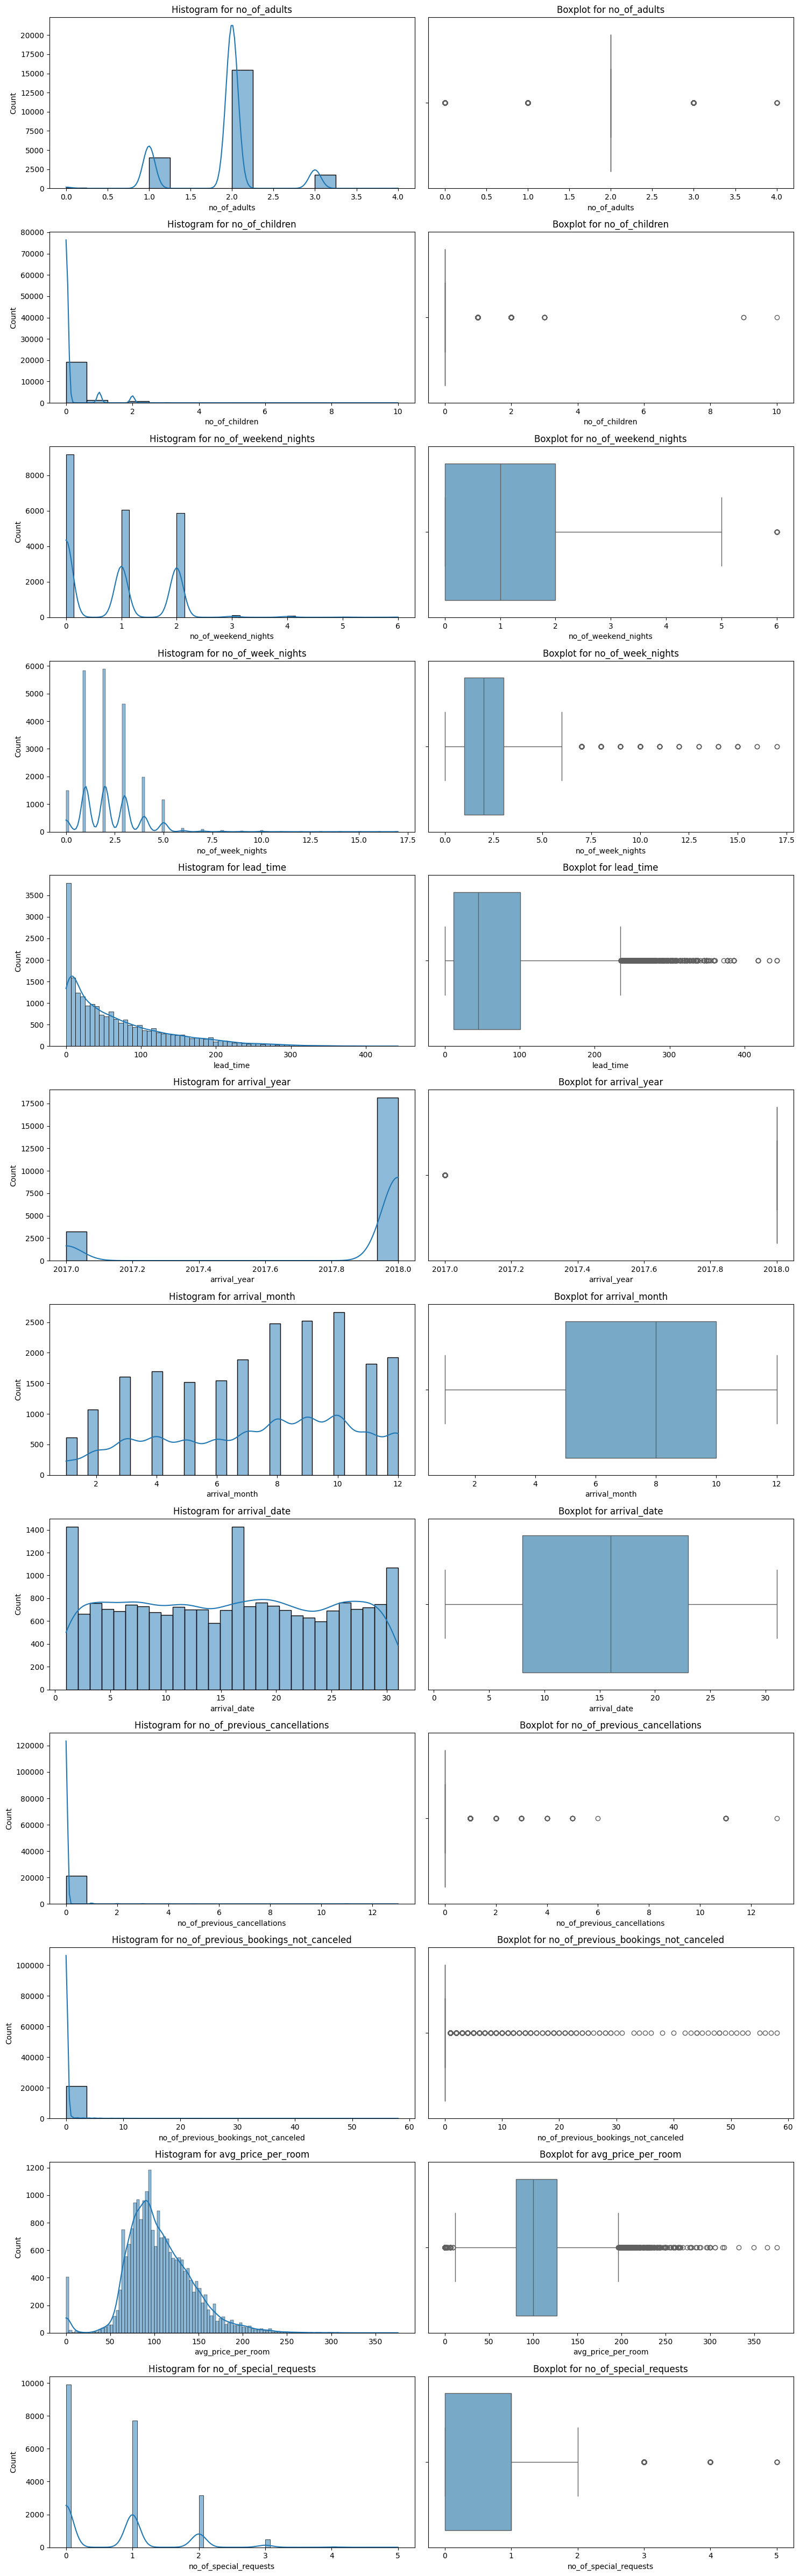

In [41]:
num_plot_dist(data,num_cols)

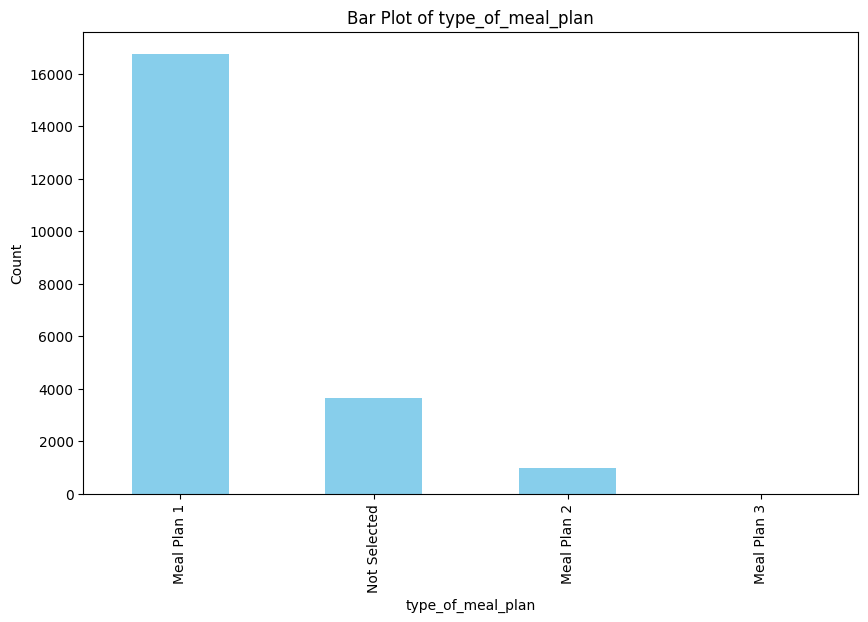

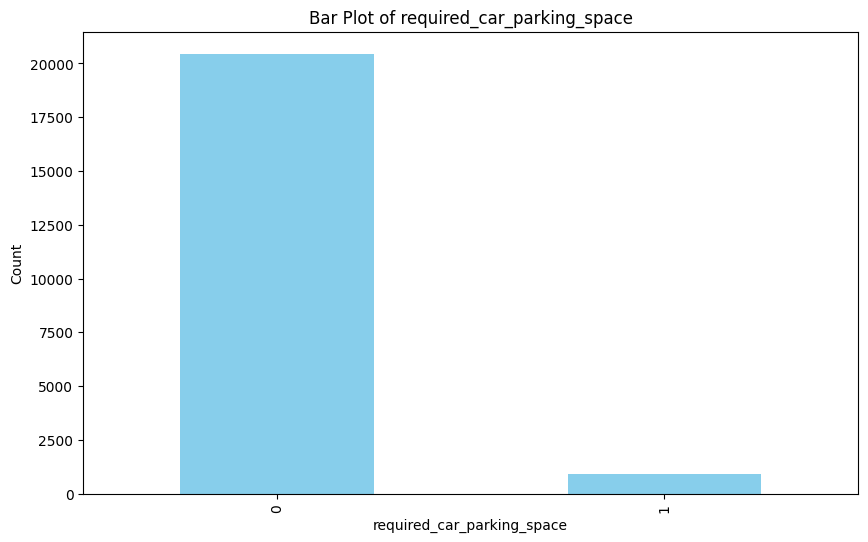

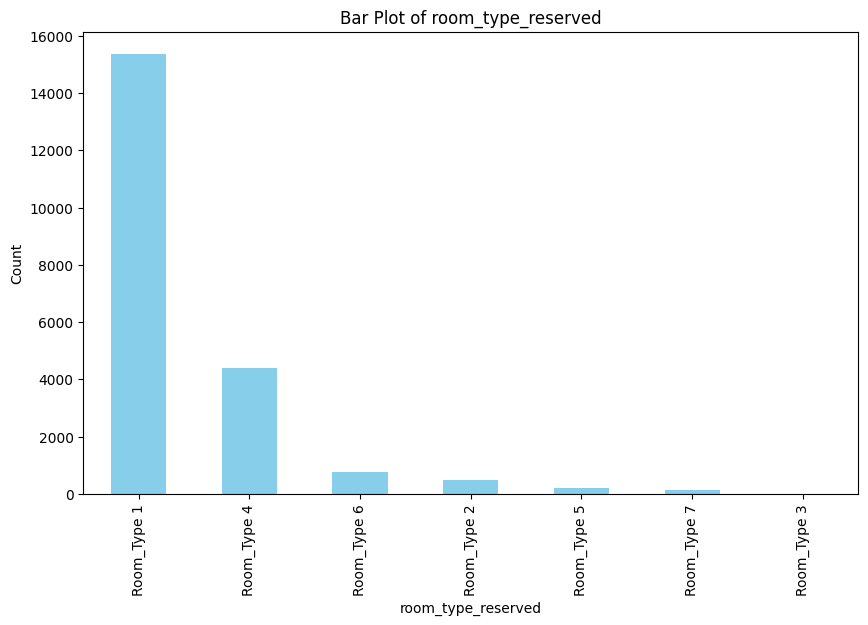

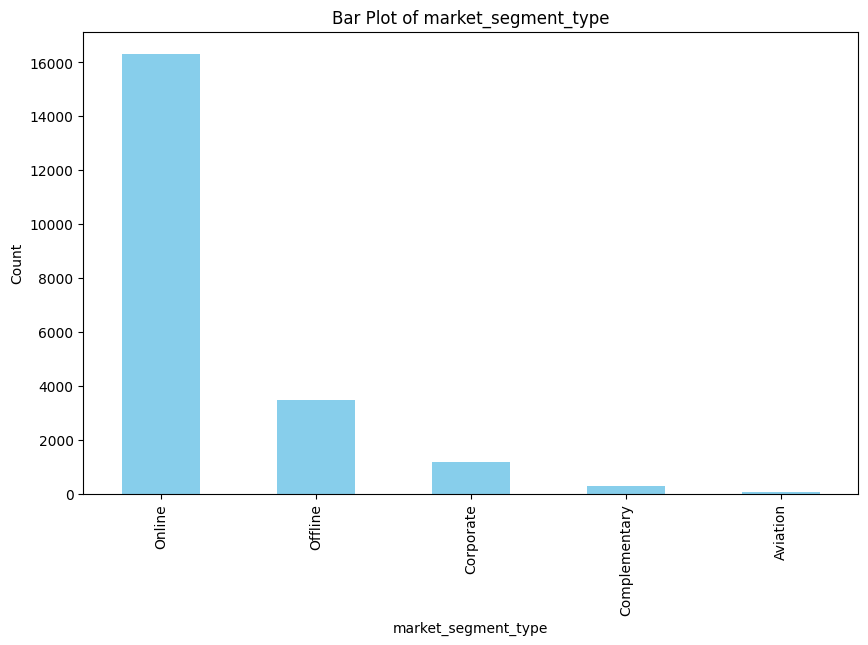

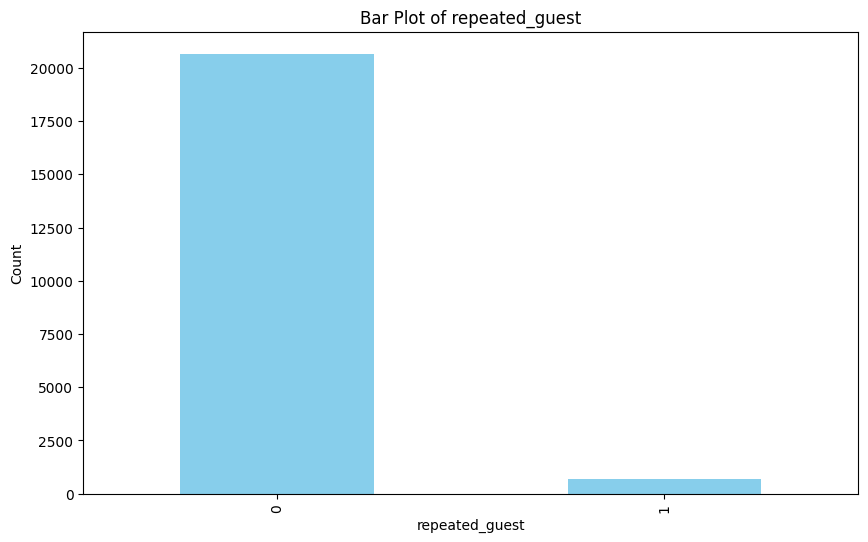

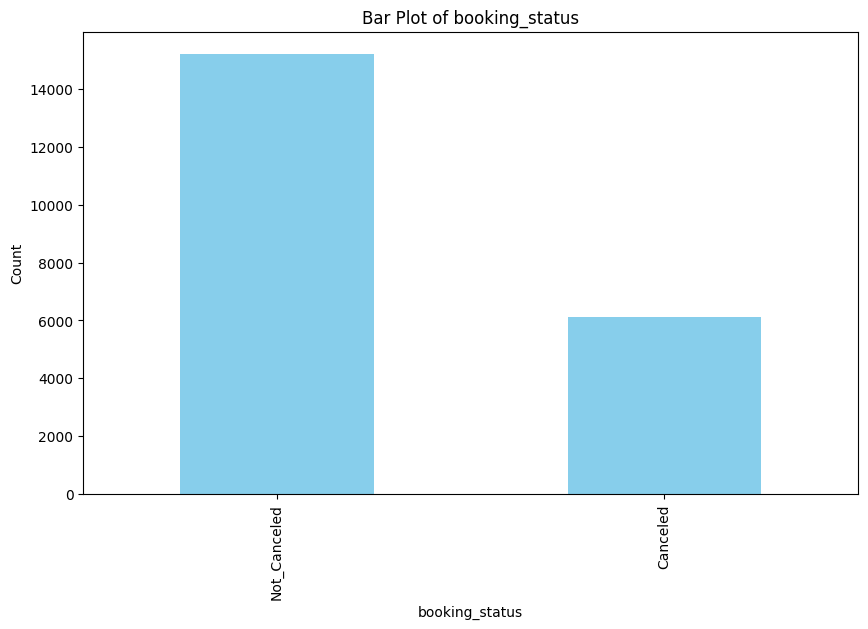

In [46]:
for column in cat_cols:
    plt.figure(figsize=(10,6))
    data[column].value_counts().plot(kind = 'bar',color = 'skyblue')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

### Bivariate Analysis

In [56]:
def plot_num_bivariate(df,target_column,num_cols):
    num_plots = len(num_cols)
    num_rows = (len(num_cols)+1)//2

    fig,axes = plt.subplots(num_rows,2,figsize = (15,5*num_rows))
    axes = axes.flatten()

    for i,column in enumerate(num_cols):
        sns.boxplot(data = df, x = target_column,y = column, ax=axes[i])
        axes[i].set_title(f"{column} vs {target_column}")

    plt.tight_layout()
    plt.show()

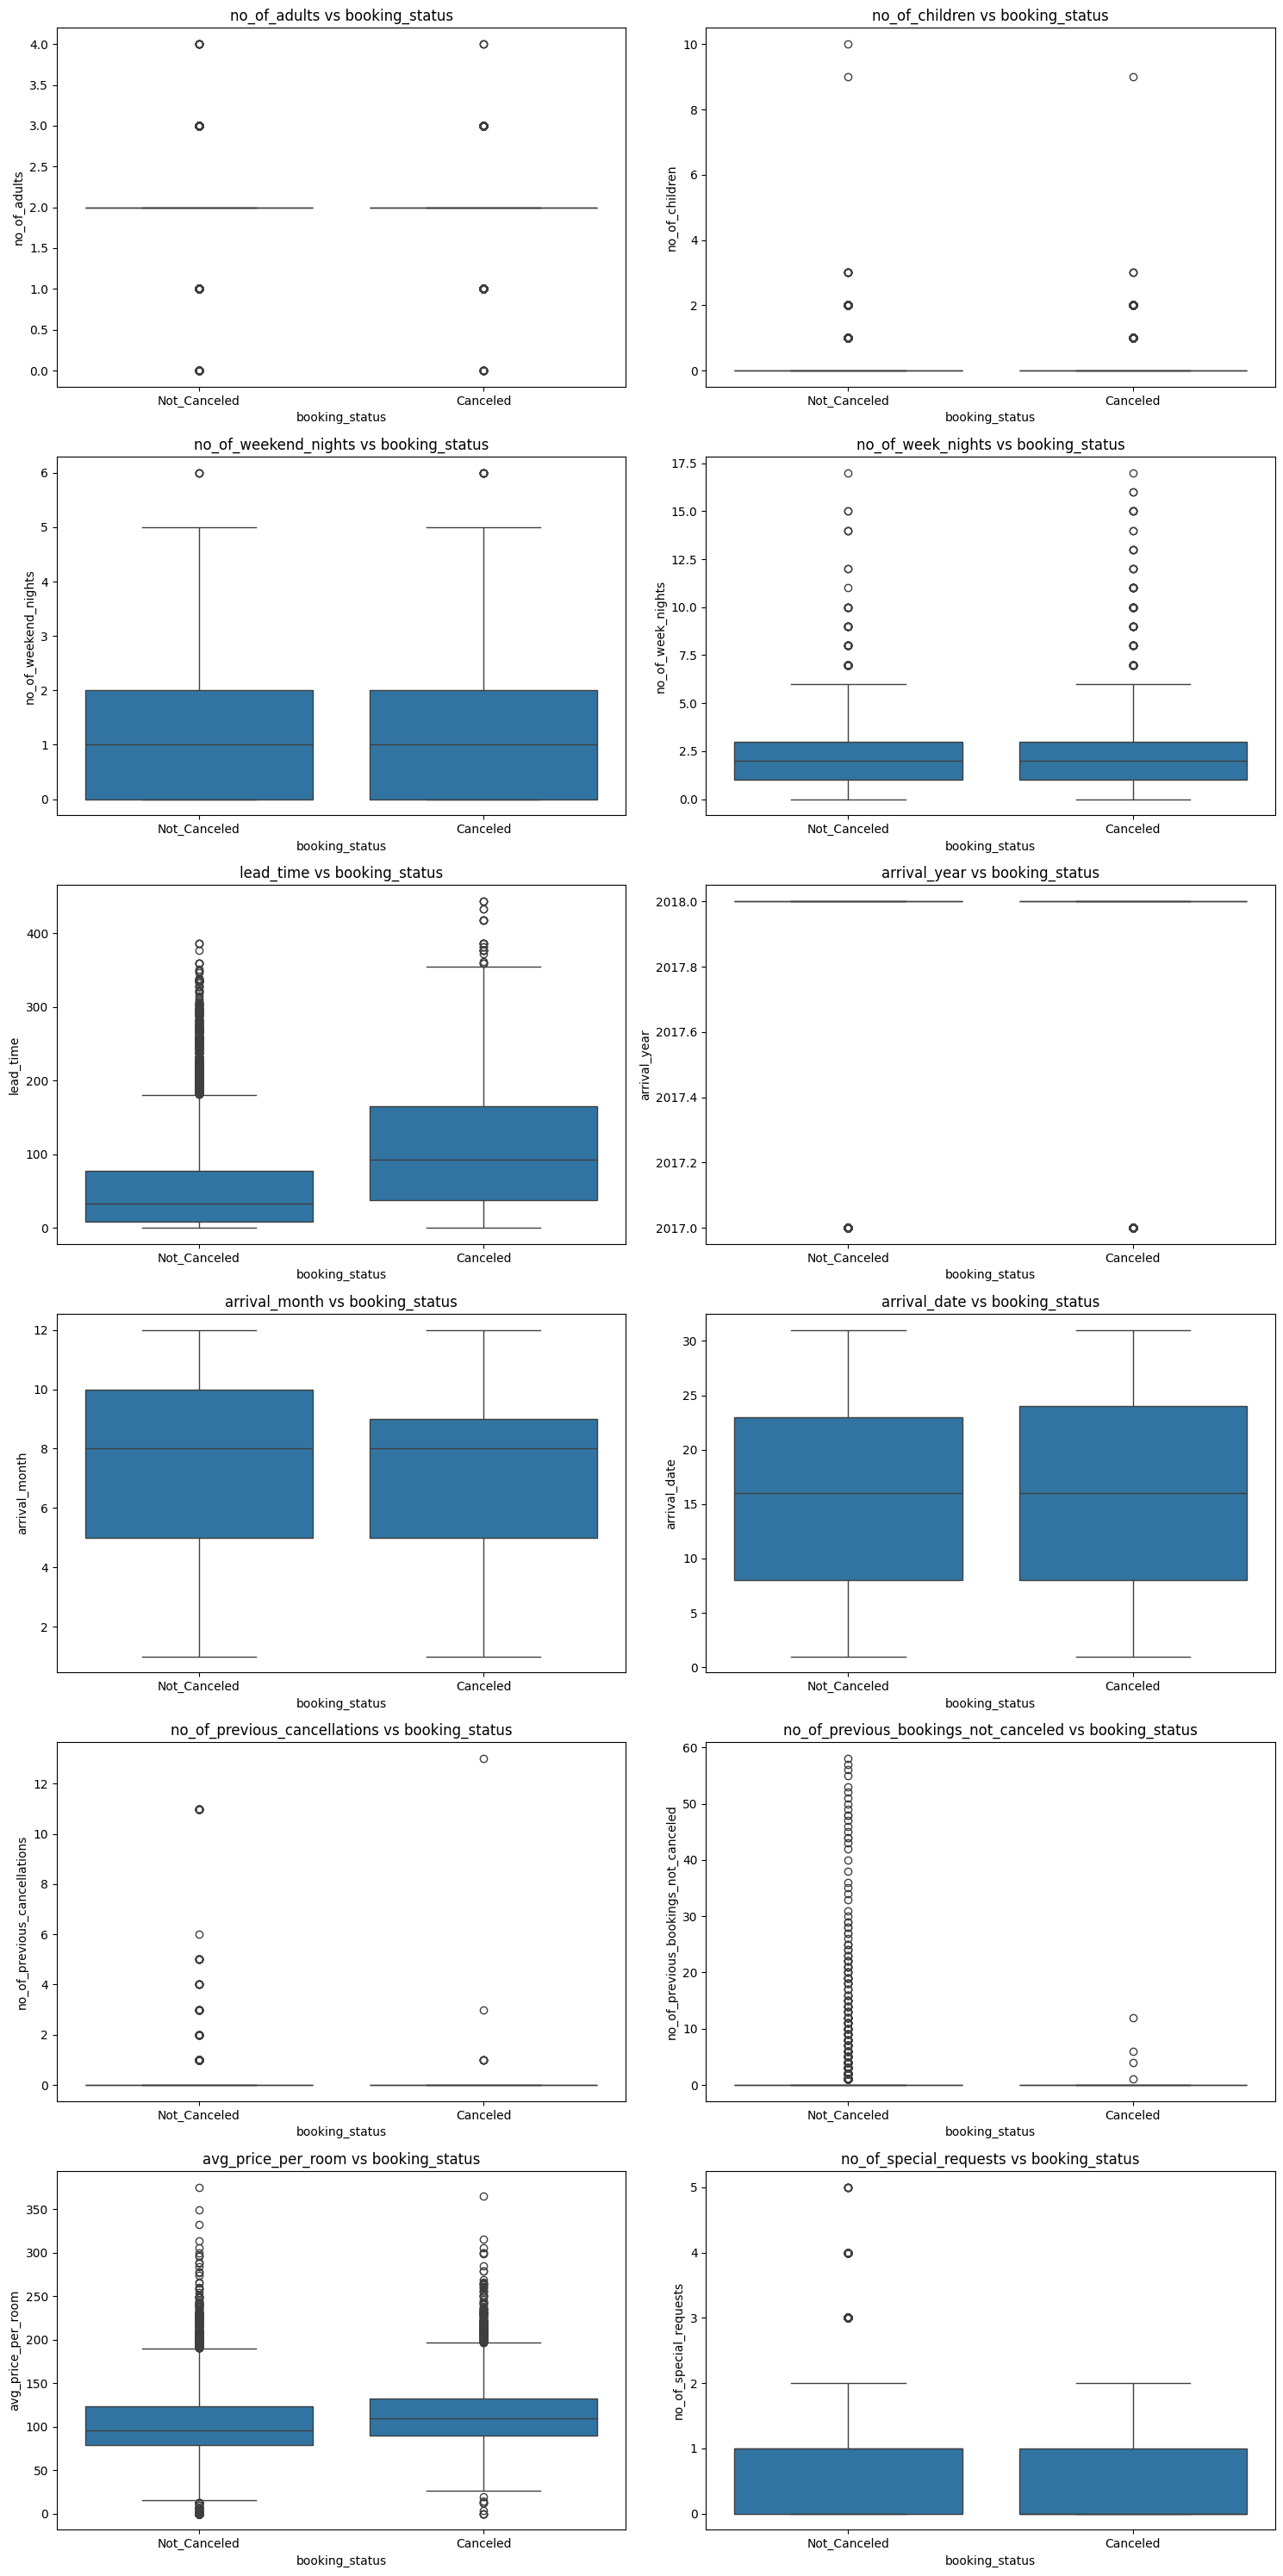

In [57]:
plot_num_bivariate(data,'booking_status',num_cols)

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

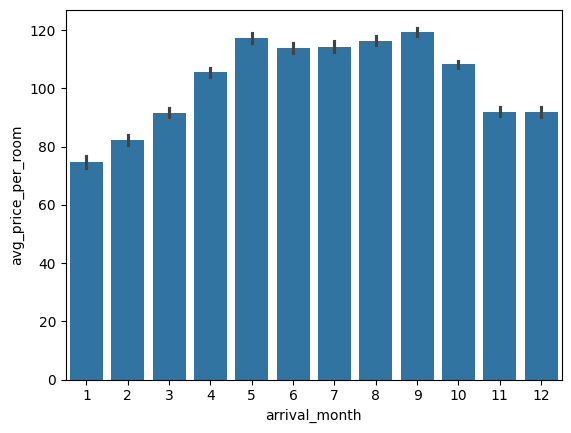

In [58]:
sns.barplot(data = df,x = 'arrival_month',y = 'avg_price_per_room')

In [59]:
def plot_cat_bivariate(df,target_column,cat_cols):
    cat_plots = len(cat_cols)
    cat_rows = (len(cat_cols)+1)//2

    fig,axes = plt.subplots(cat_rows,2,figsize = (15,5*cat_rows))
    axes = axes.flatten()

    for i,column in enumerate(cat_cols):
        sns.countplot(x = column, hue = target_column,data = df, ax=axes[i])
        axes[i].set_title(f"{column} vs {target_column}")
        axes[i].tick_params(axis = 'x',rotation = 45)

    plt.tight_layout()
    plt.show()

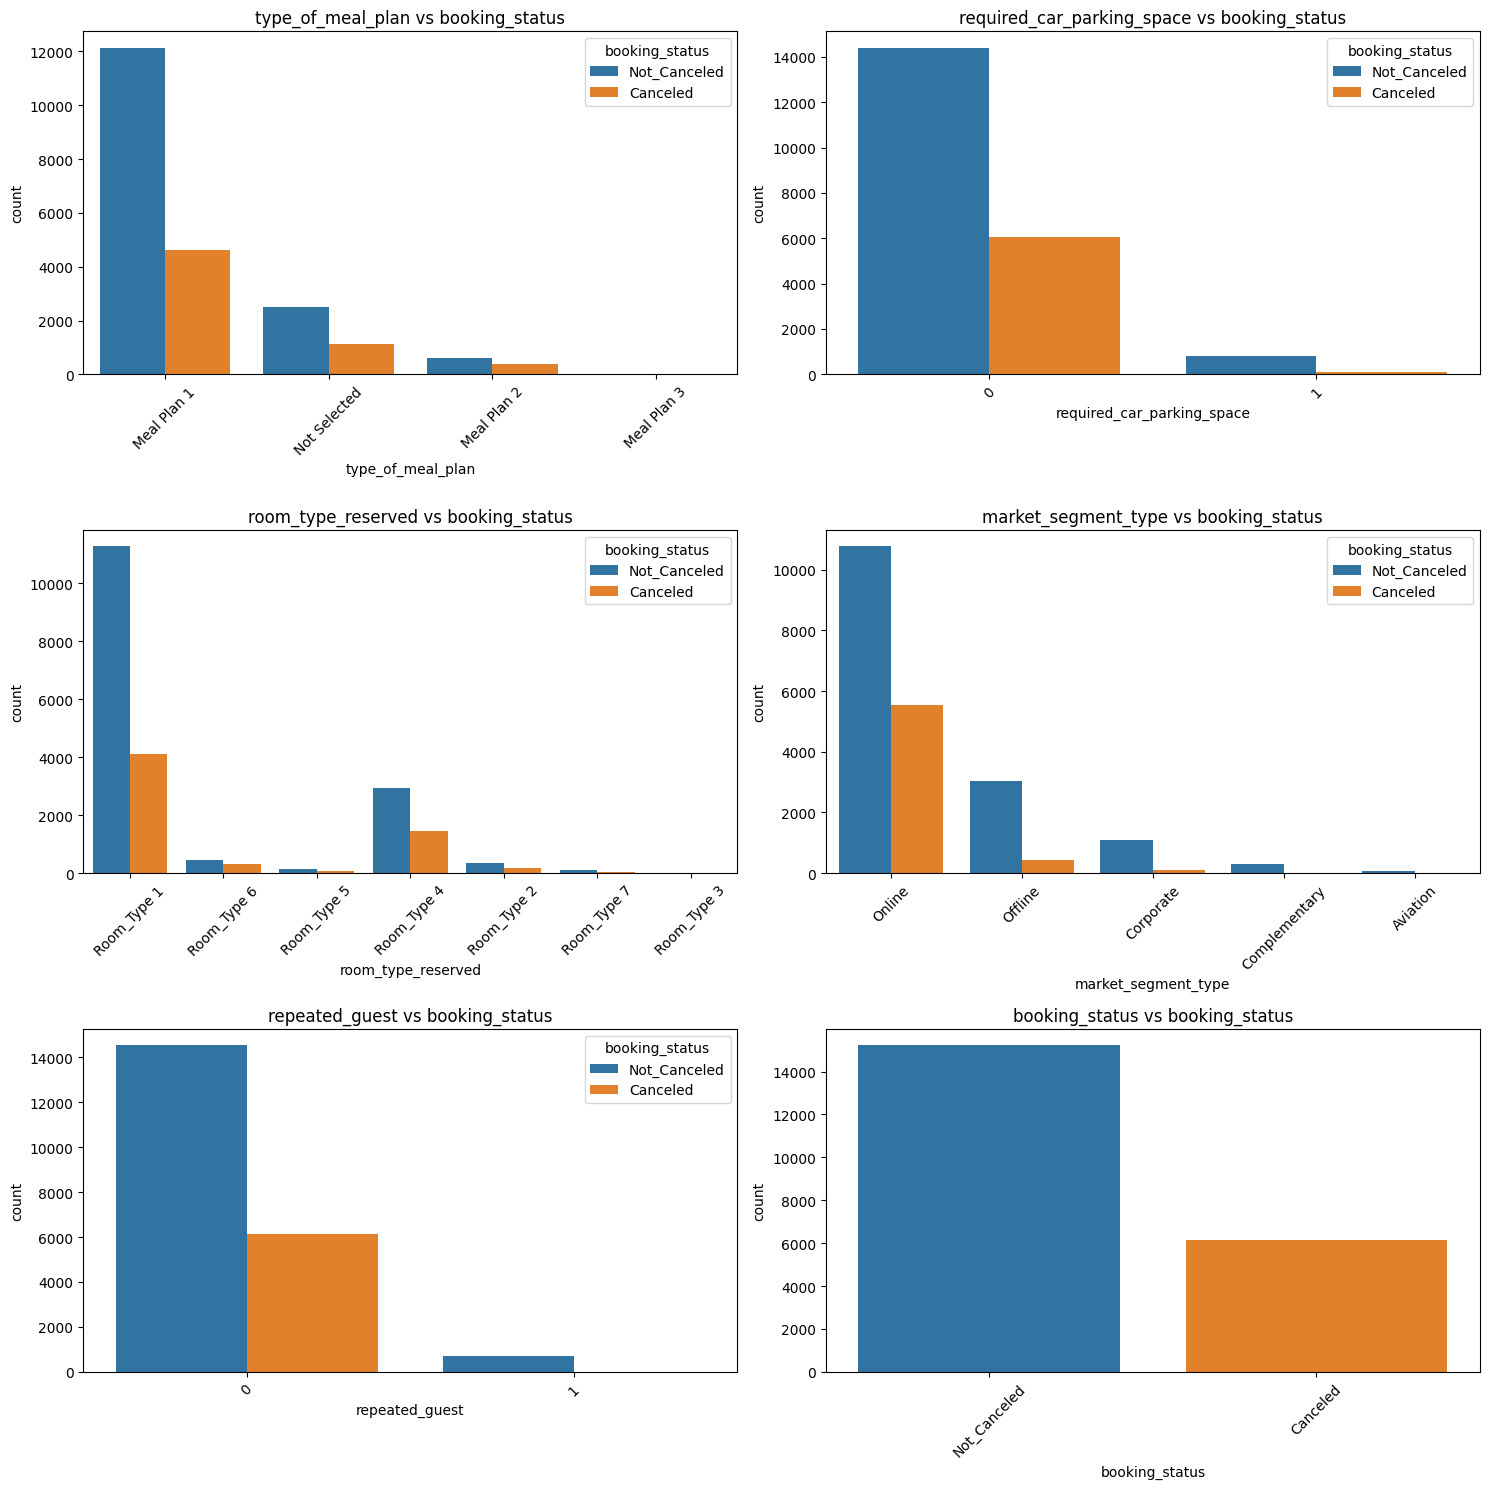

In [60]:
plot_cat_bivariate(data,'booking_status',cat_cols)

## Data Processing

In [61]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [63]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder


In [64]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}


In [65]:
mappings


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [68]:
### Check for multicollinearity 
# !pip install -q statsmodels

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [70]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [ ]:
vif_data

,features,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### Since we do not have VIF above 5; we can say there is no multicollinearity that exists.

<Axes: >

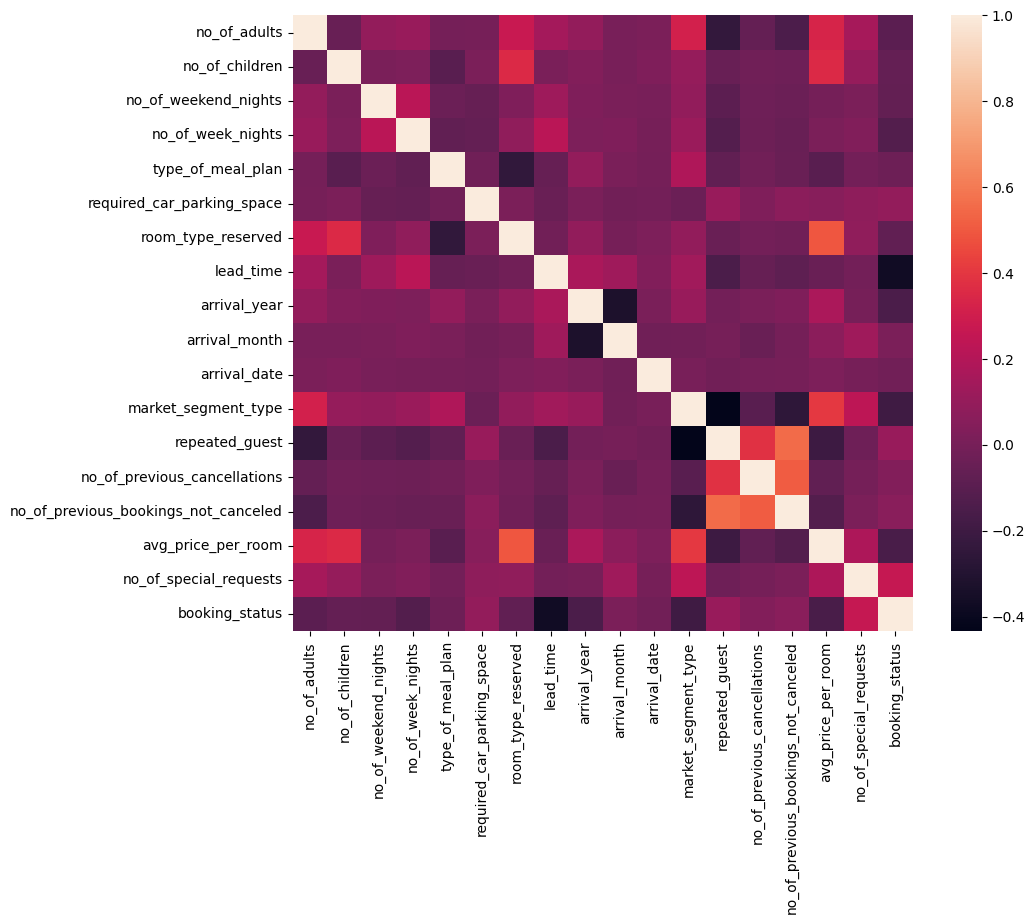

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [76]:
#### Skewness

In [77]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [ ]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])



In [80]:
df.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [81]:
### Handle Imbalance in data
df['booking_status'].value_counts()


booking_status
1    15231
0     6128
Name: count, dtype: int64

In [82]:
mappings['booking_status']

{'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}

In [83]:
X = df.drop('booking_status',axis = 1)
y = df['booking_status']

In [ ]:
# !pip install -q imbalanced-learn

In [87]:
y.value_counts() # before SMOTE

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(random_state=42)
 
X_res, y_res = smote.fit_resample(X,y)
print(type(X_res))

/Users/rohangaikar/projects/hotel-reservation-prediction/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>


In [91]:
y_res.value_counts() # After SMOTE

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [92]:
balance_df = pd.DataFrame(X_res,columns=X.columns)
balance_df['booking_status'] = y_res

balance_df.shape

(30462, 18)

In [93]:
balance_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [94]:
df = balance_df.copy()

In [96]:
#### Feature Selection
len(df.columns)

18

In [97]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('booking_status',axis = 1)
y = df['booking_status']



In [98]:
model = RandomForestClassifier(random_state=42)

In [99]:
model.fit(X,y)


RandomForestClassifier(random_state=42)

In [100]:
feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame(
    {
        'features' : X.columns,
        'importance':feature_importances
    }
)


In [104]:
feature_importances_df = feature_importances_df.sort_values('importance',ascending=False)


In [108]:
top_10_features = feature_importances_df[:10].features.values

In [109]:
top_10_df = df[top_10_features.tolist() + ['booking_status']]
top_10_df.shape

(30462, 11)

In [110]:
df = top_10_df.copy()

## Model Selectiom

In [ ]:
# !pip install -q xgboost lightgbm

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24369, 17)
(6093, 17)
(24369,)
(6093,)


In [131]:
classifiers ={
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state = 42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)

}

In [135]:
metrics = {
    'model' : [],
    'accuracy' : [],
    'roc_auc': [],
    'f1': [],
    'precision': [],
    'recall': []
}

In [136]:
%%time
import time
for model,classifier in classifiers.items():
    tic = time.time()
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    metrics['model'].append(model)
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['f1'].append(f1)
    metrics['recall'].append(recall)
    metrics['precision'].append(precision)

    toc = time.time()

    print(f'Model {model} done in {round(toc-tic,2)} seconds..')


    

Model Random Forest done in 1.83 seconds..
Model Logistic Regression done in 0.1 seconds..


/Users/rohangaikar/projects/hotel-reservation-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Gradient Boosting done in 1.83 seconds..
Model Support Vector Machine done in 18.19 seconds..
Model Decision Tree done in 0.08 seconds..
Model KNN done in 0.44 seconds..
Model Naive Bayes done in 0.01 seconds..
Model XGBoost done in 0.2 seconds..
Model AdaBoostClassifier done in 0.43 seconds..
[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857
Model LightGBM done in 0.36 seconds..
CPU times: user 25.4 s, sys: 1.08 s, total: 26.4 s
Wall time: 23.5 s


In [138]:
pd.DataFrame(metrics).sort_values('accuracy',ascending=False)

,model,accuracy,roc_auc,f1,precision,recall
0,Random Forest,0.897752,0.897744,0.898551,0.898404,0.898697
7,XGBoost,0.887904,0.887835,0.889643,0.882655,0.896743
9,LightGBM,0.876416,0.876268,0.879539,0.864194,0.895440
4,Decision Tree,0.845725,0.845807,0.845089,0.855237,0.835179
2,Gradient Boosting,0.844247,0.844042,0.849245,0.828837,0.870684
8,AdaBoostClassifier,0.799442,0.799521,0.798616,0.808205,0.789251
1,Logistic Regression,0.786805,0.786920,0.784898,0.798249,0.771987
5,KNN,0.779419,0.780239,0.754834,0.857794,0.673941
3,Support Vector Machine,0.665682,0.664924,0.697010,0.641391,0.763192
6,Naive Bayes,0.577056,0.580149,0.299157,0.906096,0.179153


In [139]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [140]:
X = df.drop('booking_status',axis = 1)
y = df['booking_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [141]:
random_forest = RandomForestClassifier(random_state=42)

In [154]:
params_dist = {
    'n_estimators' : randint(1,500),
    'max_depth' : (10,75),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap' : [True,False]
}

In [155]:
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=params_dist,
    cv = 5,
    n_iter=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
    )

In [156]:
%%time
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=75, min_samples_leaf=1, min_samples_split=8, n_estimators=107; total time=   1.6s
[CV] END bootstrap=True, max_depth=75, min_samples_leaf=1, min_samples_split=8, n_estimators=107; total time=   1.5s
[CV] END bootstrap=True, max_depth=75, min_samples_leaf=1, min_samples_split=8, n_estimators=107; total time=   1.5s
[CV] END bootstrap=True, max_depth=75, min_samples_leaf=1, min_samples_split=8, n_estimators=107; total time=   1.5s
[CV] END bootstrap=True, max_depth=75, min_samples_leaf=1, min_samples_split=8, n_estimators=107; total time=   1.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=122; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=122; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=122; total time=   1.7s
[

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': (10, 75),
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28fdd3670>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x291e2e640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x289441850>},
                   random_state=42, scoring='accuracy', verbose=2)

In [157]:
random_search.best_estimator_

RandomForestClassifier(max_depth=75, min_samples_split=8, n_estimators=107,
                       random_state=42)

In [159]:
best_params = random_search.best_params_
best_params


{'bootstrap': True,
 'max_depth': 75,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 107}

In [160]:
best_rf_model = random_search.best_estimator_

In [161]:
y_pred = best_rf_model.predict(X_test)


In [162]:
accuracy = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

In [163]:
accuracy


0.8842934515017233

In [164]:
## Save this model
import joblib

In [165]:
joblib.dump(best_rf_model,'random_forest.pkl')

['random_forest.pkl']

In [168]:
loaded_model = joblib.load('random_forest.pkl')
loaded_model.predict(X_train[0:1])

array([1])